<a href="https://colab.research.google.com/github/dhawalnegi1/EVA/blob/master/Project-6/Assignment6_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assingment 6A -Model for cifar10 

The target is to beat the base accuracy 
Validation - 83.6 and respective Training - 91.6

Import all the requirments 

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


Import the cifar dataset and store in the variables for training and test purpose.

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(test_labels))
print(num_classes)

10


Plot 1 image of each class and lable it.

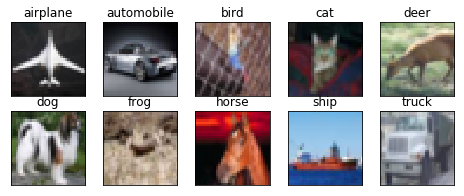

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

Function plot_model_history to plot the graph of comparision of accuracies and loss with no of epocs.

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

Function accuracy is defined to calculate the validation accuracy by finding total no of images classfied correctly

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

Pixel Normalisation is done for training and testing data.
And the class labels for training and testing data is converted into one-hot encoding.

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

A sequential model with the architecture of [3 ,3 ,3 ,mp ,3 ,3 ,3 ,mp ,3 ,3 ,3 ] is made using different no. of kernelas and padding wherever required, and Receptive field is commented after every layer.

In [9]:
# Define the model
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same',use_bias=False, input_shape=(32, 32, 3))) #3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3,use_bias=False))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3,use_bias=False))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(64,1,use_bias=False))
model.add(MaxPooling2D(pool_size=(2, 2)))#14

model.add(Convolution2D(64, 3, 3, border_mode='same',use_bias=False))#16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3,use_bias=False))#18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3,use_bias=False))#20
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(64,1,use_bias=False))
model.add(MaxPooling2D(pool_size=(2, 2)))#40

model.add(Convolution2D(64, 3, 3, border_mode='same',use_bias=False))#42
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3,use_bias=False))#44
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3,use_bias=False))#46
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10,1,use_bias=False))

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), use_bias=False, input_shape=(32, 32, 3..., padding="same")`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), use_bias=False)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), use_bias=False, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3

Model is compiled and its summary is printed.

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1728      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36864     
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 64)        0         
__________

Model is Trained for 50 epocs and checkpoint is used to saved the model with best validation accuracy and time taken to run is calculated. plot_model_history function is called to plot the graph between accuracy and epocs and loss and epocs. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 29s 75ms/step - loss: 1.4958 - acc: 0.4544 - val_loss: 1.3581 - val_acc: 0.5287

Epoch 00001: val_acc improved from -inf to 0.52870, saving model to saved.hdf5
Epoch 2/50
390/390 [==============================] - 26s 66ms/step - loss: 1.0057 - acc: 0.6407 - val_loss: 1.5059 - val_acc: 0.5238

Epoch 00002: val_acc did not improve from 0.52870
Epoch 3/50
390/390 [==============================] - 25s 65ms/step - loss: 0.7949 - acc: 0.7199 - val_loss: 1.0954 - val_acc: 0.6362

Epoch 00003: val_acc improved from 0.52870 to 0.63620, saving model to saved.hdf5
Epoch 4/50
390/390 [==============================] - 25s 65ms/step - loss: 0.6878 - acc: 0.7589 - val_loss: 0.8025 - val_acc: 0.7212

Epoch 00004: val_acc improved from 0.63620 to 0.72120, saving model to saved.hdf5
Epoch 5/50
390/390 [==============================] - 25s 65ms/step - loss: 0.6084 - acc: 0.7871 - val_loss: 0.7232 - val_acc: 0.7536

Epoch 00005: val_acc improved fr

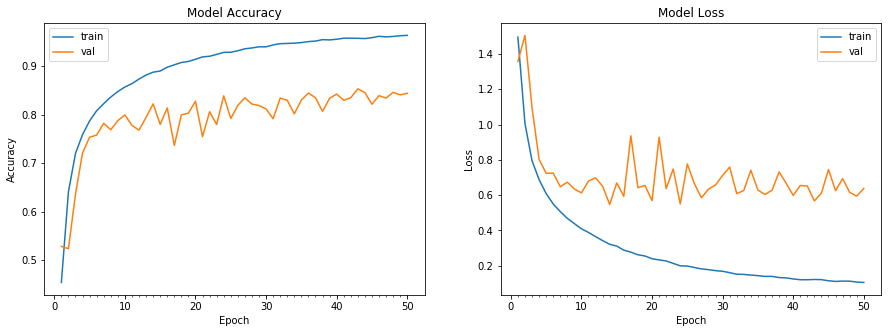

Accuracy on test data is: 84.39


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
# train the model
start = time.time()
# Train the model
filepath="saved.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),callbacks= callbacks_list, verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Model is Trained for 50 epocs and checkpoint is used to saved the model with best validation accuracy and time taken to run is calculated. 

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
# train the model
start = time.time()
# Train the model
filepath="saved.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),callbacks= callbacks_list, verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

Epoch 1/50
  2/390 [..............................] - ETA: 29s - loss: 0.0967 - acc: 0.9648

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`


390/390 [==============================] - 25s 65ms/step - loss: 0.0997 - acc: 0.9645 - val_loss: 0.7701 - val_acc: 0.8082

Epoch 00001: val_acc improved from -inf to 0.80820, saving model to saved.hdf5
Epoch 2/50
390/390 [==============================] - 25s 65ms/step - loss: 0.0981 - acc: 0.9644 - val_loss: 0.6357 - val_acc: 0.8463

Epoch 00002: val_acc improved from 0.80820 to 0.84630, saving model to saved.hdf5
Epoch 3/50
390/390 [==============================] - 25s 64ms/step - loss: 0.0977 - acc: 0.9655 - val_loss: 0.5768 - val_acc: 0.8583

Epoch 00003: val_acc improved from 0.84630 to 0.85830, saving model to saved.hdf5
Epoch 4/50
390/390 [==============================] - 25s 65ms/step - loss: 0.1012 - acc: 0.9638 - val_loss: 0.6048 - val_acc: 0.8490

Epoch 00004: val_acc did not improve from 0.85830
Epoch 5/50
390/390 [==============================] - 25s 64ms/step - loss: 0.0918 - acc: 0.9675 - val_loss: 0.6498 - val_acc: 0.8462

Epoch 00005: val_acc did not improve from 0

The best model is loaded and the accuray of it is printed 

In [0]:
from keras.models import load_model
model = load_model('saved.hdf5')
score = model.evaluate(test_features, test_labels, verbose=0)
print(score)

[0.6281729671597481, 0.865]
